# Forewords

I am heavily relying on shortcuts in Jupyter

Requires to be out of focus of a "cell" -> `Escape`:
* Add cell above: `a`
* Add cell bellow: `b`
* Cut cell (delete): `x`
* Paste cell: `v`
* Undo: `z`
* Show help: `h`

Within a code cell -> `Enter`:
* Autocomplete code: `Tab`
* Show tooltip: `Shift` + `Tab`
* Execute cell: `Ctrl` + `Enter`
* Execute cell and move to next: `Ctrl` + `Shift`

Show function help:
* inside function ( ): `Shift` + `Tab`
* function doc: `ez.get_image?`
* function code: `ez.get_image??`

# 1 - Connecting to OMERO 

In [1]:
import ezomero as ez
from getpass import getpass

In [1]:
import ezomero as ez
from getpass import getpass

In [2]:
USER = "participant-a"
PWD = getpass(prompt=f"Password for {USER}")
OMERO_GROUP = "Workshop Metadata Annotation"

Password for participant-a ········


### Default port (4064) -> can be blocked by your university firewall

In [25]:
HOST = "omero-training.gerbi-gmb.de"
PORT = 4064

### Websocket port (uses instead HTTPS port)

In [3]:
HOST = "wss://omero-training.gerbi-gmb.de/omero-wss"
PORT = 443

In [12]:
conn = ez.connect(USER, PWD, group=OMERO_GROUP, host=HOST, port=PORT, secure=True)
print(f"Is connected: {conn.isConnected()}")

Is connected: True


# 2 - List content with ezomero
https://thejacksonlaboratory.github.io/ezomero/genindex.html

In [19]:
# datasets in the project with id:138
dataset_ids = ez.get_dataset_ids(conn, project=138)
dataset_ids

[3741, 3742]

In [17]:
# images in the dataset with id:3741
image_ids = ez.get_image_ids(conn, dataset=3741)
image_ids[:10] # show first 10

[10897, 11046, 10925, 11053, 10968, 10878, 11010, 11042, 10937, 10899]

In [20]:
# datasets annotated with tag id:7522
dataset_ids = ez.get_dataset_ids(conn, annotation=7522)
dataset_ids

[3951, 3954, 3962, 3971]

In [10]:
# Iterate on images in datasets annotated with tag id 7522
for dataset_id in ez.get_dataset_ids(conn, annotation=7522):
    for image_id in ez.get_image_ids(conn, dataset=dataset_id):
        print(f"Dataset: {dataset_id}\tImage: {image_id}")

Dataset: 3951	Image: 27887
Dataset: 3951	Image: 27760
Dataset: 3951	Image: 27846
Dataset: 3951	Image: 27724
Dataset: 3954	Image: 27783
Dataset: 3954	Image: 27785
Dataset: 3954	Image: 27770
Dataset: 3954	Image: 27738
Dataset: 3962	Image: 27797
Dataset: 3962	Image: 27871
Dataset: 3962	Image: 27658
Dataset: 3962	Image: 27701
Dataset: 3971	Image: 27684
Dataset: 3971	Image: 27832
Dataset: 3971	Image: 27685
Dataset: 3971	Image: 27776


# 3 - Reading image with ezomero

In [36]:
# Image with single channel, timepoint, slice
image_obj, pixels = ez.get_image(conn, 27887)
print(f"Image shape: {pixels.shape}. Pixel type: {image_obj.getPixelsType()}")

print(" X:", image_obj.getSizeX())
print(" Y:", image_obj.getSizeY())
print(" Z:", image_obj.getSizeZ())
print(" C:", image_obj.getSizeC())
print(" T:", image_obj.getSizeT())

Image shape: (1, 1, 1024, 1280, 1). Pixel type: uint16
 X: 1280
 Y: 1024
 Z: 1
 C: 1
 T: 1


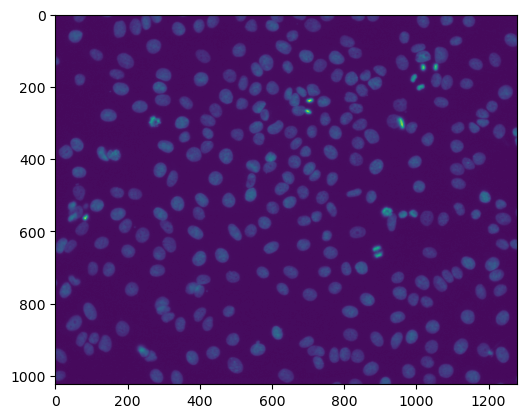

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(pixels[0,0]) # Show the image at T:0 Z:0

In [39]:
# Image with single timepoint, slice but five channels
image_obj, pixels = ez.get_image(conn, 30623)
print(f"Image shape: {pixels.shape}. Pixel type: {image_obj.getPixelsType()}")

print(" X:", image_obj.getSizeX())
print(" Y:", image_obj.getSizeY())
print(" Z:", image_obj.getSizeZ())
print(" C:", image_obj.getSizeC())
print(" T:", image_obj.getSizeT())

Image shape: (1, 1, 1552, 2080, 5). Pixel type: uint16
 X: 2080
 Y: 1552
 Z: 1
 C: 5
 T: 1


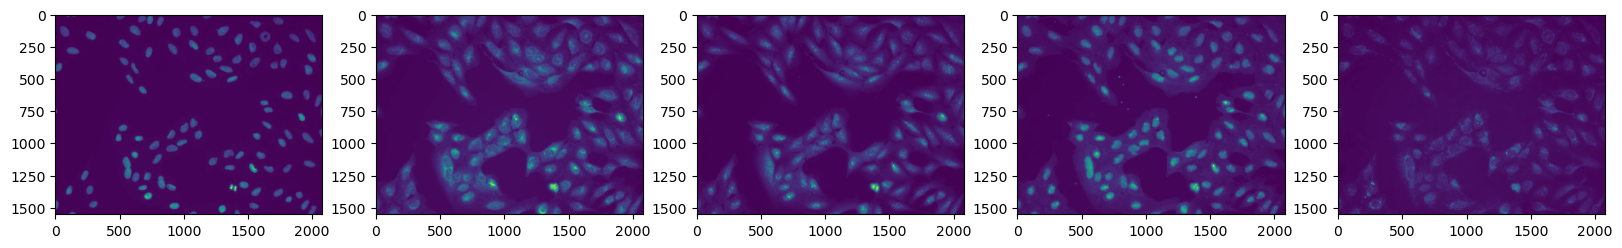

In [54]:
import matplotlib.pyplot as plt

fig, axis = plt.subplot_mosaic(mosaic=[["A", "B", "C", "D", "E"]], figsize=(20,15))
axis["A"].imshow(pixels[0,0,:,:,0]) # Show the image at T:0 Z:0 C:0
axis["B"].imshow(pixels[0,0,:,:,1]) # Show the image at T:0 Z:0 C:1
axis["C"].imshow(pixels[0,0,:,:,2]) # Show the image at T:0 Z:0 C:2
axis["D"].imshow(pixels[0,0,:,:,3]) # Show the image at T:0 Z:0 C:3
axis["E"].imshow(pixels[0,0,:,:,4]) # Show the image at T:0 Z:0 C:4